In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Modelowanie zużycia energii elektrycznej na 1 mieszkańca w kWh w zależności od wybranych czynników

##### Wczytanie danych

In [2]:
df_source = pd.read_excel('./data/dane_zuzycie_energii.xlsx', sheet_name='Sheet1')
df_source.index = pd.RangeIndex(start=1, stop=43, step=1)
df_source.index.name = 'Observation No.'
df_source

,Powiat,Y - zużycie energii elektrycznej na 1 mieszkańca [kWh],X1 - przeciętna liczba osób na 1 mieszkanie [os],X2 - ludność na 1 km2 [os/km2],X3 - mieszkania oddane do użytkowania na 1000 ludności [-],X4 - przeciętne miesięczne wynagrodzenie brutto [zł],X5 - stopa bezrobocia rejestrowanego [%],X6 - ludność w wieku 15-34 [os],X7 - liczba mieszkań [-],X8 - powierzchnia użytkowa mieszkań [m2],X9 - wskaźnik urbanizacji [%]
Observation No.,,,,,,,,,,,
1,Powiat białobrzeski,707.6,2.72,52.5,3.0,3461.85,10.1,9725,11833,973610,23.6
2,Powiat ciechanowski,708.5,2.50,85.2,1.9,3840.19,13.1,24902,31131,2357060,52.6
3,Powiat garwoliński,721.6,2.82,84.7,4.0,3776.65,11.3,31822,34836,3231888,28.3
4,Powiat gostyniński,694.0,2.58,74.3,2.4,3394.93,18.5,12186,16198,1140062,41.0
5,Powiat grodziski,1077.8,2.46,249.7,7.9,4352.30,4.4,22364,35319,3560595,55.4
6,Powiat grójecki,968.2,2.49,77.7,5.0,4133.21,3.3,25605,36565,3239850,35.1
7,Powiat kozienicki,729.4,2.54,66.6,2.3,4930.22,12.8,16801,22088,1884398,29.0
8,Powiat legionowski,979.4,2.38,292.8,8.5,3975.24,10.9,27406,44131,4513662,51.1
9,Powiat lipski,633.6,2.52,47.1,2.2,3567.68,12.6,9296,13264,1091815,16.3


In [3]:
energy_cons_df = df_source.drop(columns='Powiat')
energy_cons_df

,Y - zużycie energii elektrycznej na 1 mieszkańca [kWh],X1 - przeciętna liczba osób na 1 mieszkanie [os],X2 - ludność na 1 km2 [os/km2],X3 - mieszkania oddane do użytkowania na 1000 ludności [-],X4 - przeciętne miesięczne wynagrodzenie brutto [zł],X5 - stopa bezrobocia rejestrowanego [%],X6 - ludność w wieku 15-34 [os],X7 - liczba mieszkań [-],X8 - powierzchnia użytkowa mieszkań [m2],X9 - wskaźnik urbanizacji [%]
Observation No.,,,,,,,,,,
1,707.6,2.72,52.5,3.0,3461.85,10.1,9725,11833,973610,23.6
2,708.5,2.50,85.2,1.9,3840.19,13.1,24902,31131,2357060,52.6
3,721.6,2.82,84.7,4.0,3776.65,11.3,31822,34836,3231888,28.3
4,694.0,2.58,74.3,2.4,3394.93,18.5,12186,16198,1140062,41.0
5,1077.8,2.46,249.7,7.9,4352.30,4.4,22364,35319,3560595,55.4
6,968.2,2.49,77.7,5.0,4133.21,3.3,25605,36565,3239850,35.1
7,729.4,2.54,66.6,2.3,4930.22,12.8,16801,22088,1884398,29.0
8,979.4,2.38,292.8,8.5,3975.24,10.9,27406,44131,4513662,51.1
9,633.6,2.52,47.1,2.2,3567.68,12.6,9296,13264,1091815,16.3


In [4]:
print(energy_cons_df.columns)

Index(['Y - zużycie energii elektrycznej na 1 mieszkańca [kWh]',
       'X1 - przeciętna liczba osób na 1 mieszkanie [os]',
       'X2 - ludność na 1 km2 [os/km2]',
       'X3 - mieszkania oddane do użytkowania na 1000 ludności [-]',
       'X4 - przeciętne miesięczne wynagrodzenie brutto [zł]',
       'X5 - stopa bezrobocia rejestrowanego [%]',
       'X6 - ludność w wieku 15-34 [os]', 'X7 - liczba mieszkań [-]',
       'X8 - powierzchnia użytkowa mieszkań [m2]',
       'X9 - wskaźnik urbanizacji [%]'],
      dtype='object')


### Rozdzielenie nazw zmiennych i ich opisów

In [5]:
vars = [colname.split(" - ", 1)[0] for colname in energy_cons_df.columns]
vars_description = [colname.split(" - ", 1)[1] for colname in energy_cons_df.columns]
vars_descr_dict = dict( zip(vars, vars_description) )
vars, vars_description

(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'],
 ['zużycie energii elektrycznej na 1 mieszkańca [kWh]',
  'przeciętna liczba osób na 1 mieszkanie [os]',
  'ludność na 1 km2 [os/km2]',
  'mieszkania oddane do użytkowania na 1000 ludności [-]',
  'przeciętne miesięczne wynagrodzenie brutto [zł]',
  'stopa bezrobocia rejestrowanego [%]',
  'ludność w wieku 15-34 [os]',
  'liczba mieszkań [-]',
  'powierzchnia użytkowa mieszkań [m2]',
  'wskaźnik urbanizacji [%]'])

In [6]:
energy_cons_df.columns = vars
energy_cons_df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9
Observation No.,,,,,,,,,,
1,707.6,2.72,52.5,3.0,3461.85,10.1,9725,11833,973610,23.6
2,708.5,2.50,85.2,1.9,3840.19,13.1,24902,31131,2357060,52.6
3,721.6,2.82,84.7,4.0,3776.65,11.3,31822,34836,3231888,28.3
4,694.0,2.58,74.3,2.4,3394.93,18.5,12186,16198,1140062,41.0
5,1077.8,2.46,249.7,7.9,4352.30,4.4,22364,35319,3560595,55.4


In [7]:
energy_cons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 1 to 42
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       42 non-null     float64
 1   X1      42 non-null     float64
 2   X2      42 non-null     float64
 3   X3      42 non-null     float64
 4   X4      42 non-null     float64
 5   X5      42 non-null     float64
 6   X6      42 non-null     int64  
 7   X7      42 non-null     int64  
 8   X8      42 non-null     int64  
 9   X9      42 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 3.4 KB


In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_describe = energy_cons_df.describe()
new_rows = pd.DataFrame( data=np.array( [df_describe.median(),
                                         df_describe.loc['std'] / np.sqrt(df_describe.loc['count']),
                                         df_describe.var()] ),
                         index=['median', 'standard error', 'var'],
                         columns=df_describe.columns )
df_describe = pd.concat( [df_describe.iloc[:2], new_rows, df_describe.iloc[2:]] )
df_describe.loc['range'] = df_describe.loc['max'] - df_describe.loc['min']
df_describe.loc['kurtosis'] = df_describe.kurtosis()
df_describe.loc['skew'] = df_describe.skew() 
df_describe.loc['var_coeff [%]'] = 100.00 * df_describe.loc['std'] / df_describe.loc['mean']
df_describe

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,800.73,2.57,362.28,4.01,3862.31,11.59,32798.07,53044.74,4699629.19,42.86
median,736.62,2.55,145.71,3.56,3499.00,11.42,25287.25,34935.00,2925545.88,39.50
standard error,24.78,0.05,112.39,0.36,93.76,0.88,9421.79,21641.61,1936710.36,4.02
var,162361.52,198.47,1314584.44,188.19,3496031.99,175.79,19078885611.75,101105824371.90,806298642538559.88,789.79
std,160.63,0.30,728.38,2.32,607.65,5.71,61060.17,140253.65,12551317.68,26.06
min,544.20,1.73,40.80,1.60,3232.13,2.60,8854.00,11507.00,967572.00,2.20
25%,697.40,2.42,56.12,2.40,3405.54,7.55,14750.25,17156.25,1299886.50,27.85
50%,775.85,2.54,81.05,3.10,3592.45,11.25,21244.50,27758.00,2360818.50,37.00
75%,871.30,2.74,210.38,4.58,4106.32,14.88,29330.00,42112.00,3490273.25,52.23


#### Histogramy dla zmiennych

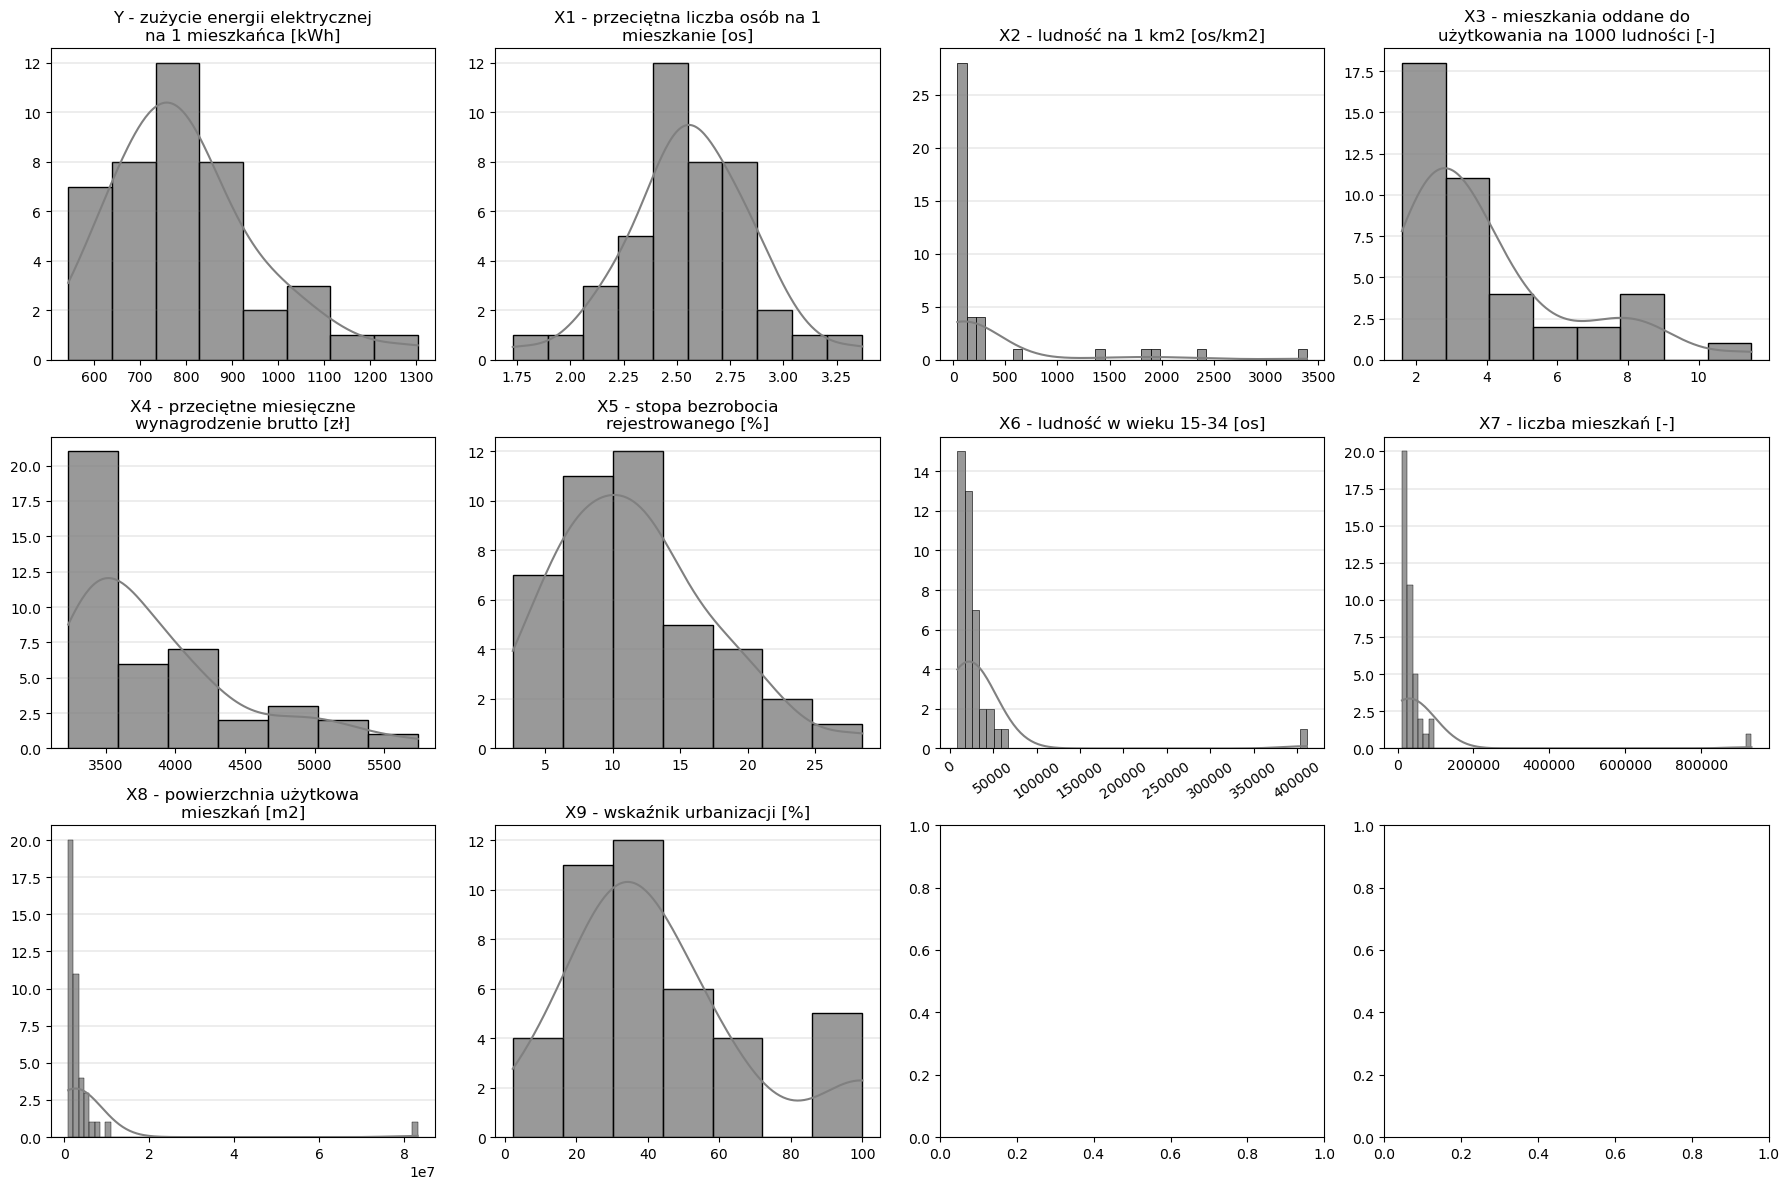

In [9]:
import textwrap

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()
for ax, var_descr in zip( axes, vars_descr_dict.items() ):
    sns.histplot(energy_cons_df[var_descr[0]], ax=ax, edgecolor='black', alpha=0.8, color='gray', kde=True)
    title = f"{var_descr[0]} - {var_descr[1]}"
    ax.set_title( "\n".join( textwrap.wrap(text=title, width=32) ) )
    ax.set_xlabel('')
    ax.set_ylabel('')
    if var_descr[0] == 'X6':
        ax.tick_params(rotation=35, axis='x')
    ax.grid(linewidth=0.2, axis='y', color='gray')
plt.tight_layout()
plt.show()

#### Wykresy zależności zmiennej objaśnianej Y od poszczególnych zmiennych objaśniających X 

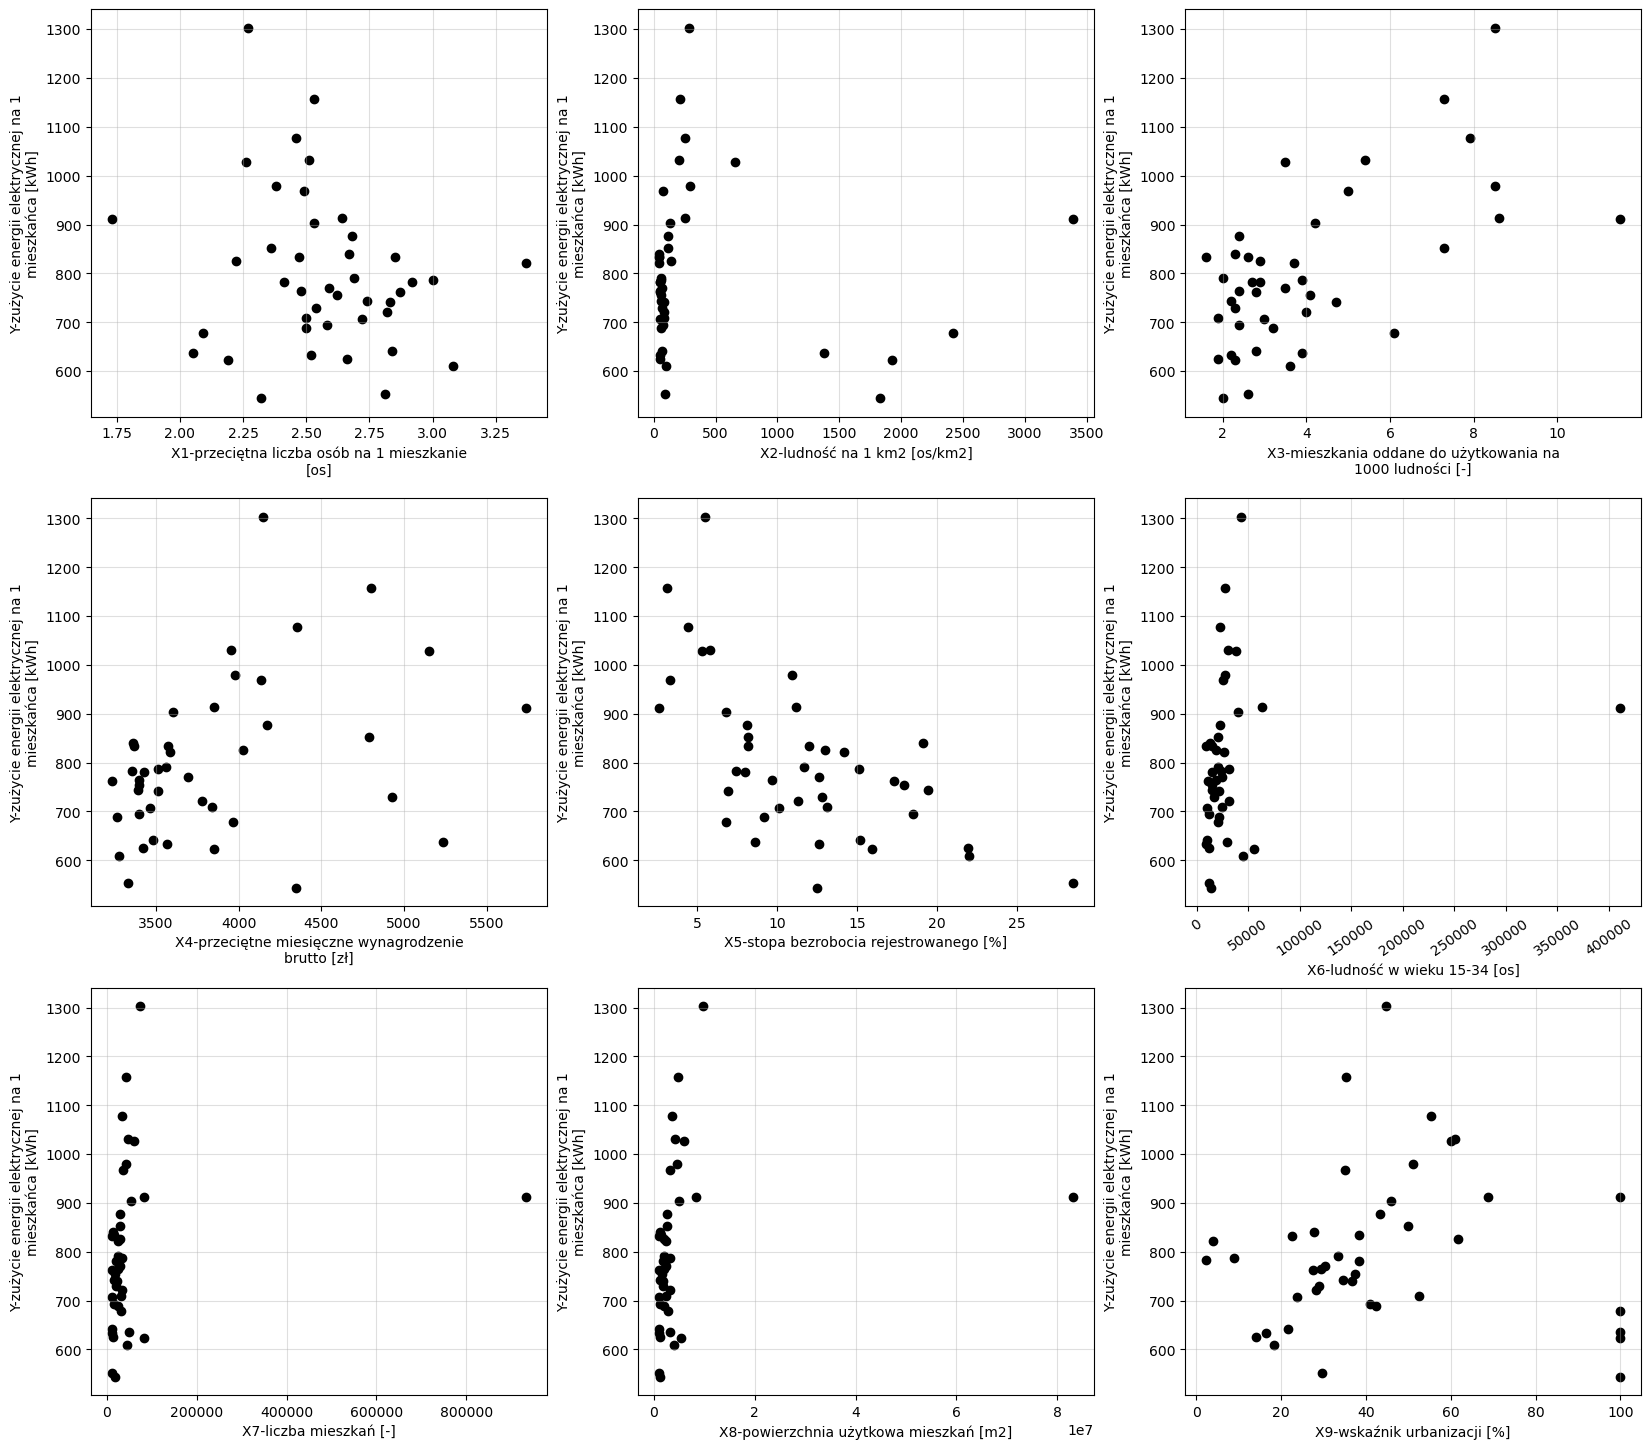

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
axes = axes.flatten()

for ax, var_descr in zip( axes, list(vars_descr_dict.items())[1:] ):
    y_label_dict = list(vars_descr_dict.items())[0]
    ax.scatter(x=energy_cons_df[var_descr[0]],
               y=energy_cons_df[y_label_dict[0]],
               color='black')
    ax.set_xlabel( "\n".join(textwrap.wrap( text=f'{var_descr[0]}-{var_descr[1]}', width=42 )) )
    ax.set_ylabel( "\n".join(textwrap.wrap( text=f'{y_label_dict[0]}-{y_label_dict[1]}', width=42 )) )
    if var_descr[0] == 'X6':
        ax.tick_params(rotation=35, axis='x')
    ax.grid(alpha=0.4)

#### Boxploty dla zmiennych

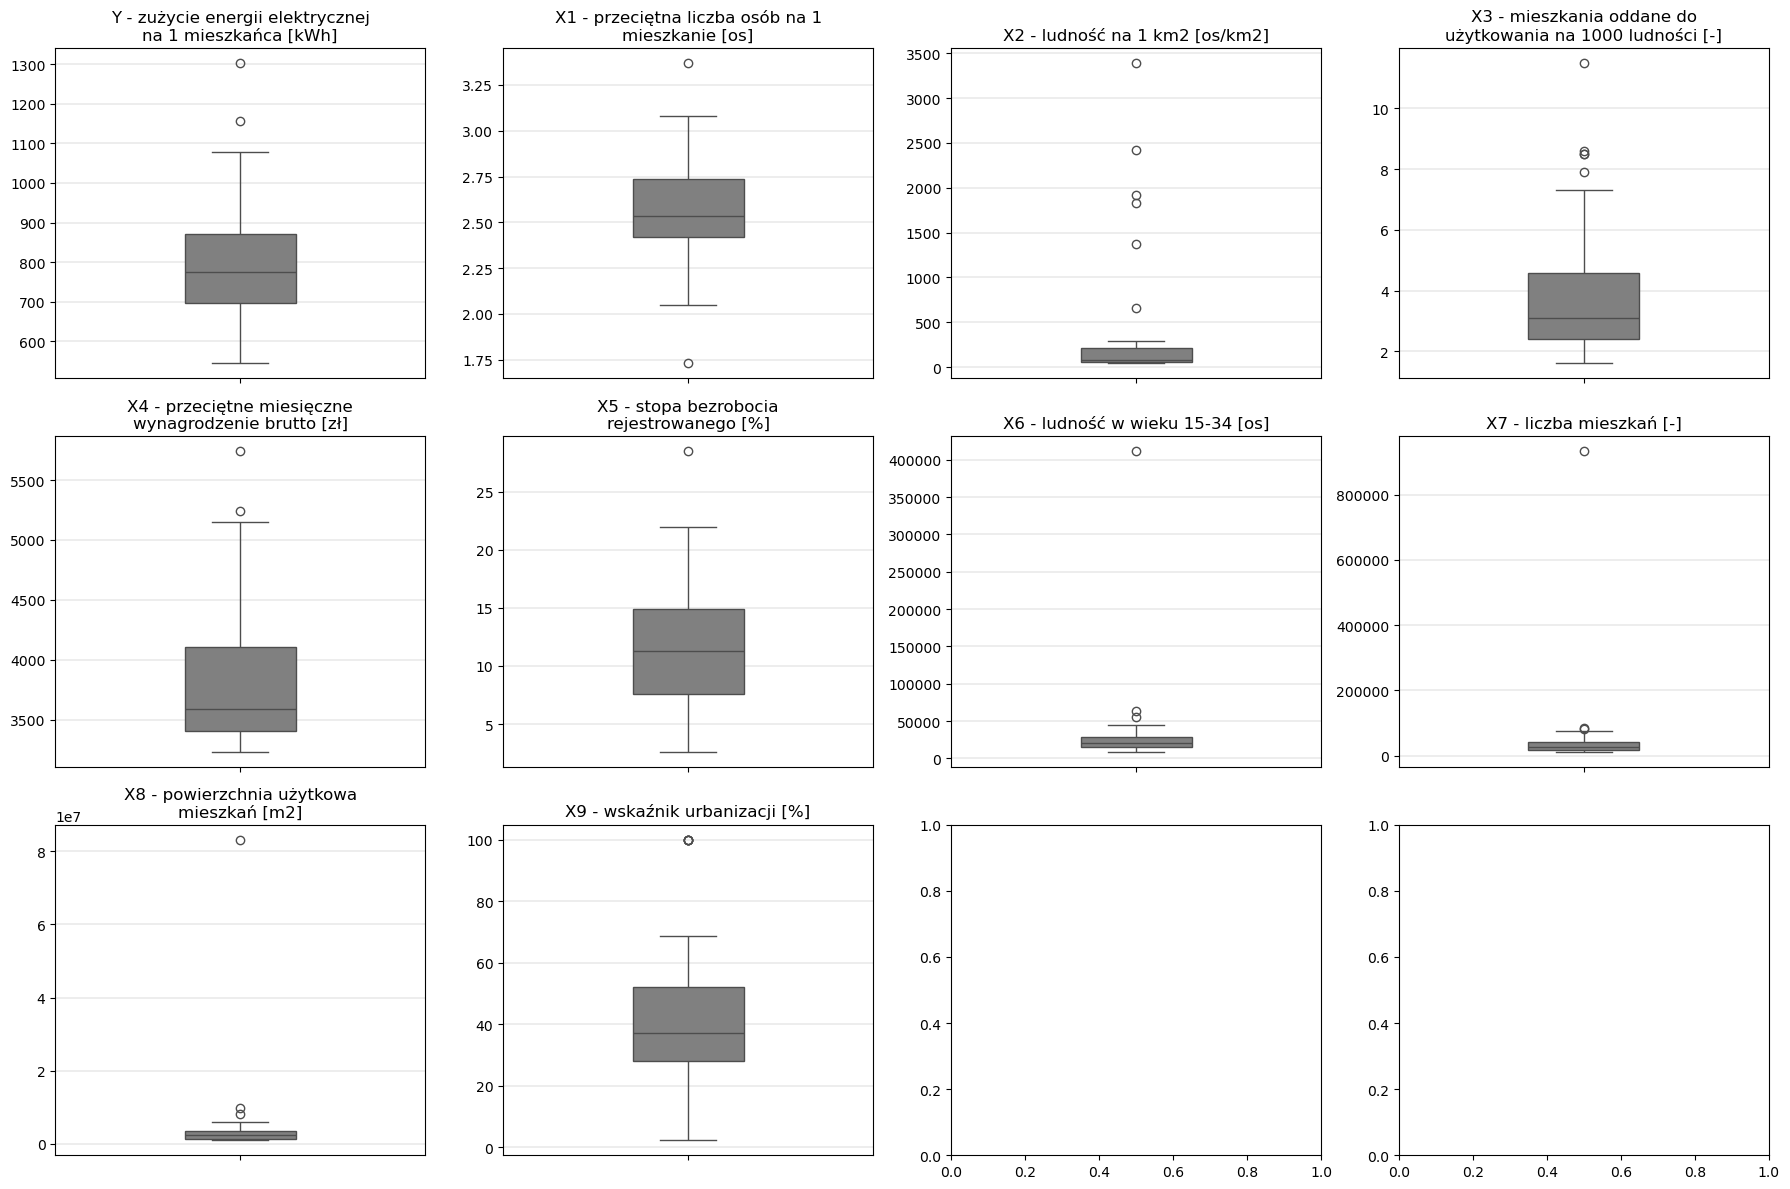

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()
for ax, var_descr in zip(axes, vars_descr_dict.items()):
    sns.boxplot(data=energy_cons_df[var_descr[0]], ax=ax, width=0.3, color='gray')
    title = f"{var_descr[0]} - {var_descr[1]}"
    ax.set_title( "\n".join( textwrap.wrap(text=title, width=32))  )
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(linewidth=0.2, axis='y', color='gray')
plt.tight_layout()
plt.show()

#### Wykresy korelacji między zmiennymi

<Figure size 1200x1000 with 0 Axes>

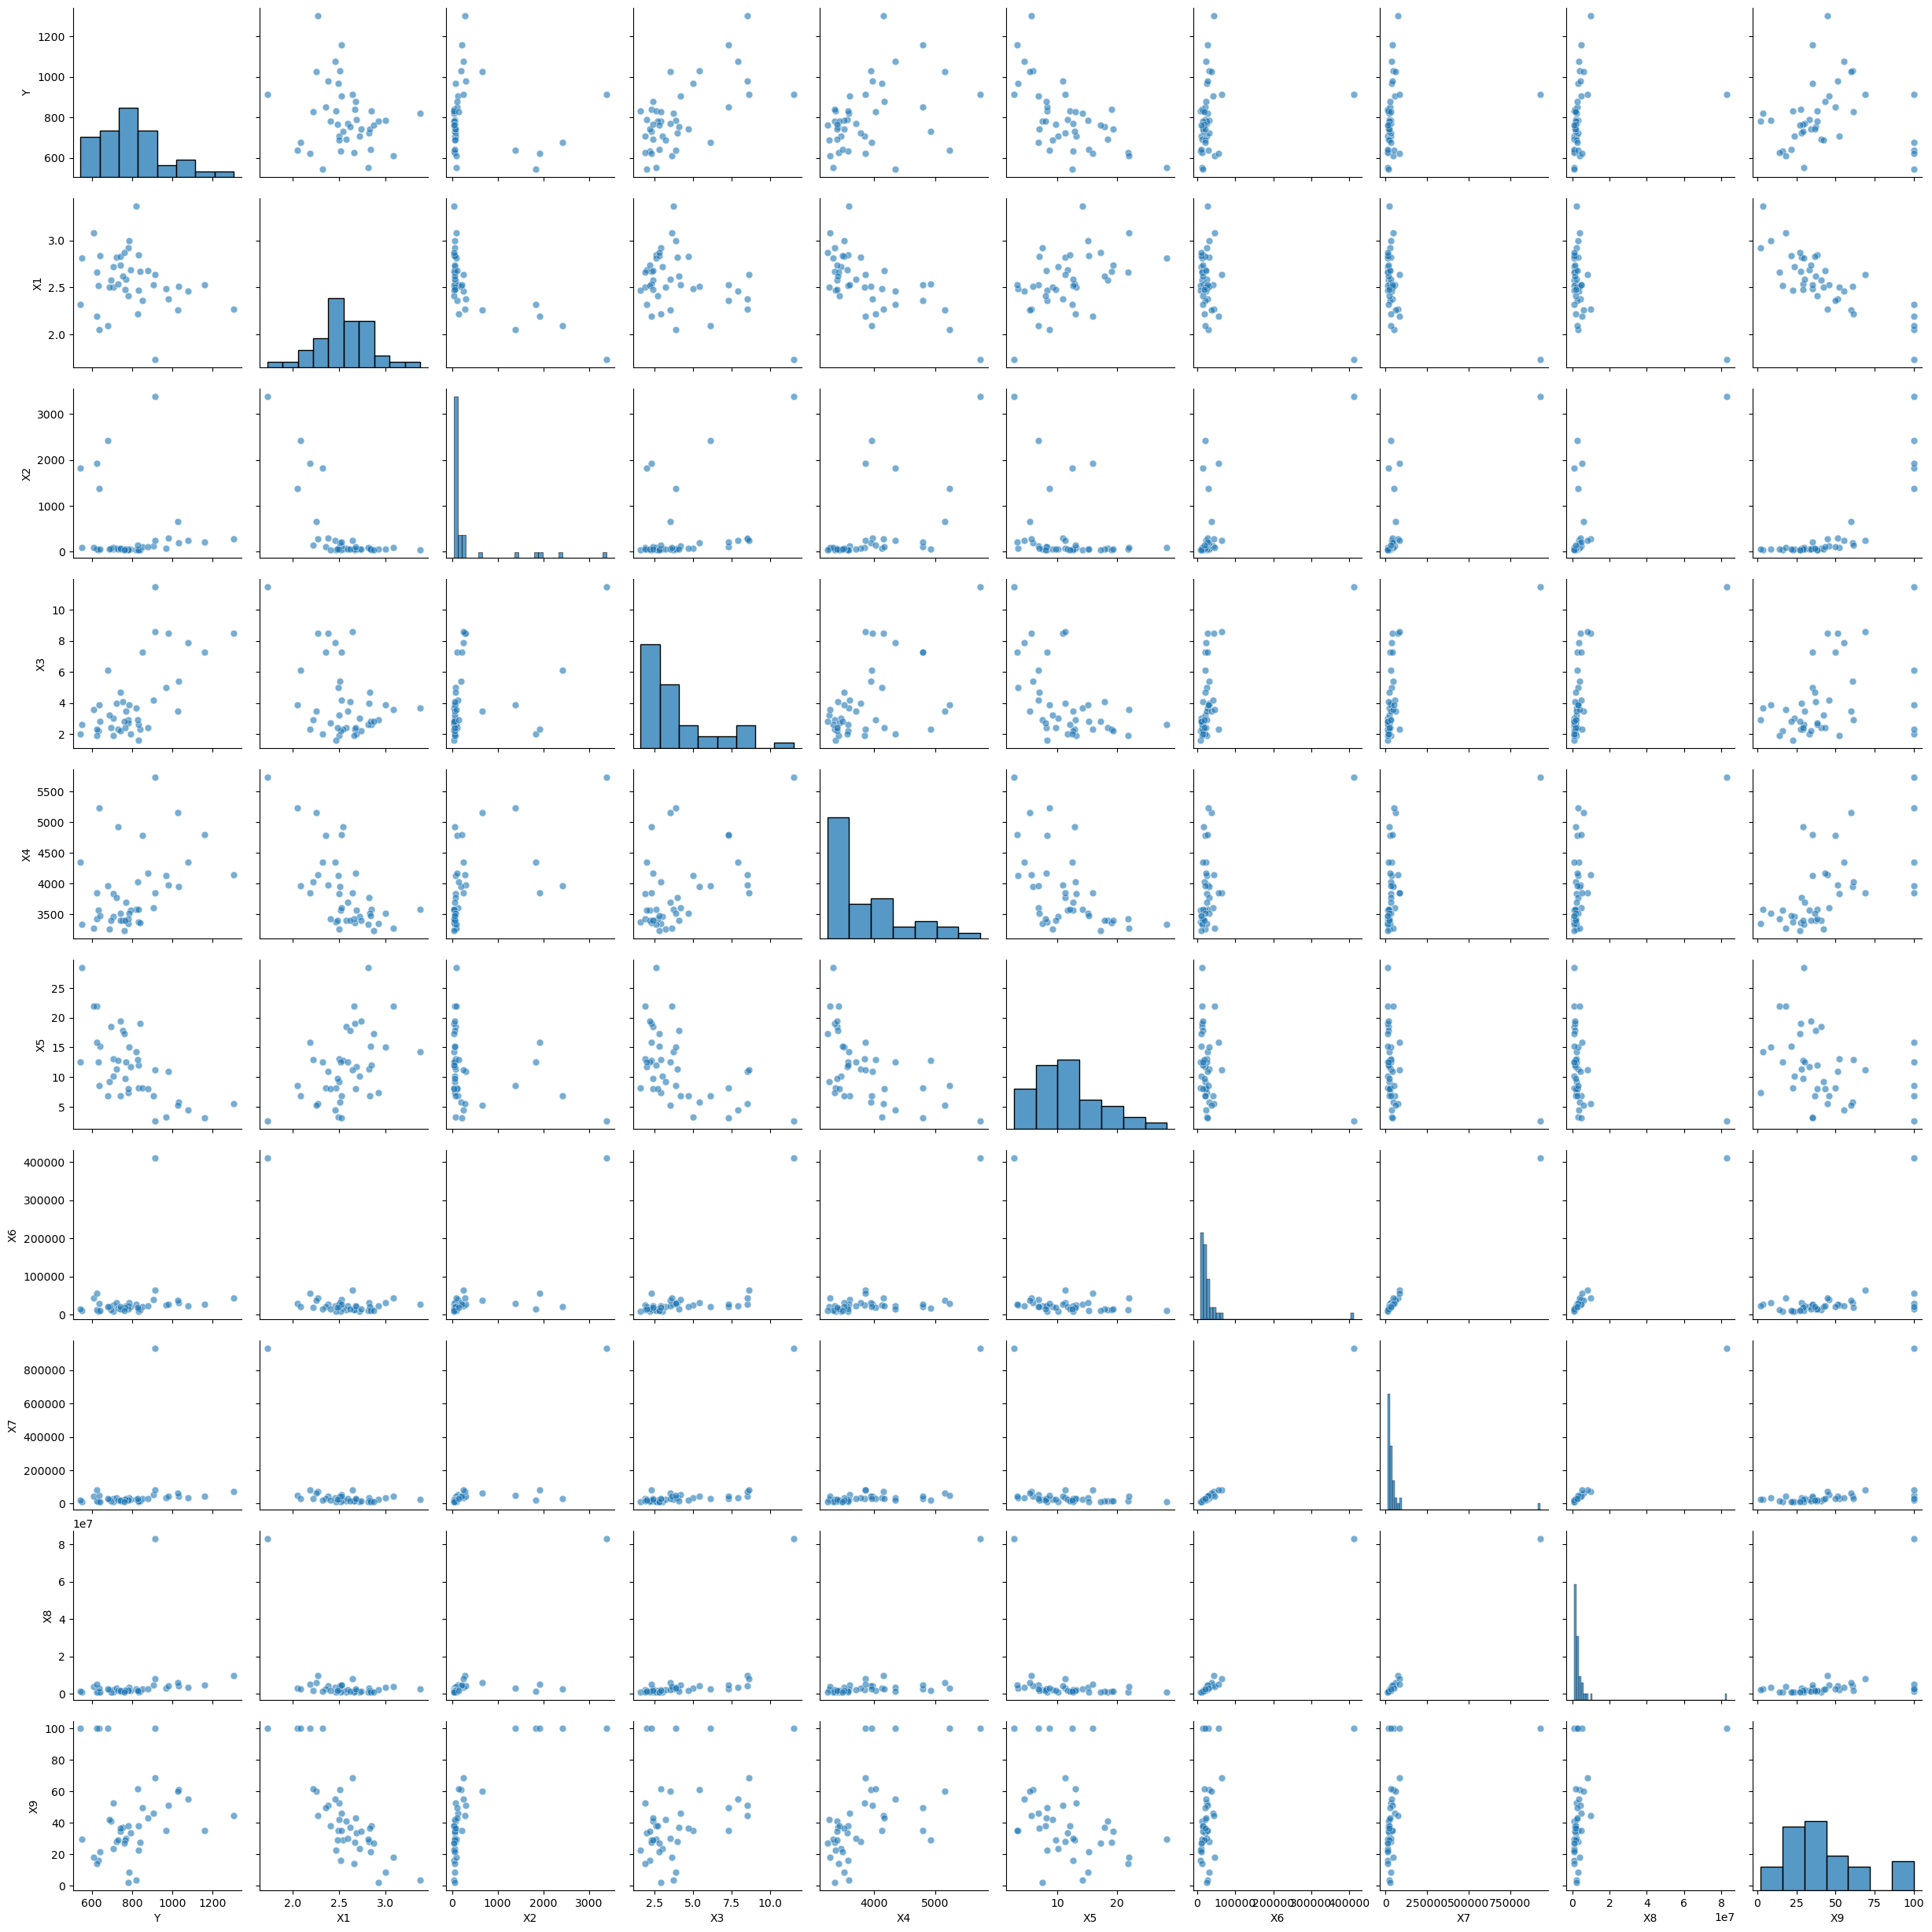

In [12]:
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(data=energy_cons_df,
                        plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'white'},
                        height=2.5)
pairplot.tight_layout()
plt.show()

#### Macierz korelacji

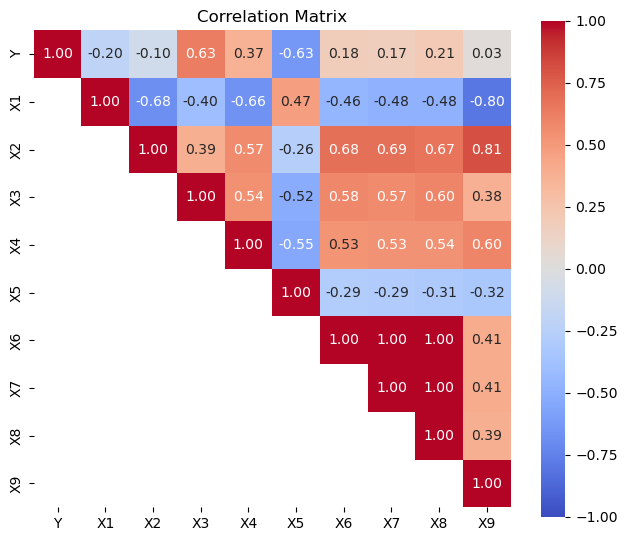

In [13]:
def corr_matrix(df):    
    corr_mat = df.corr()
    mask = np.tril( np.ones_like(corr_mat, dtype=bool), k=-1 )
    plt.figure(figsize=(6.5, 6.5))
    ax = plt.subplot(1, 1, 1)
    sns.heatmap(corr_mat, 
                annot=True, 
                fmt=".2f", 
                cmap='coolwarm', 
                vmin=-1, vmax=1,
                square=True, 
                mask=mask,
                cbar_kws={"shrink": .8}, 
                ax=ax)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

corr_matrix( energy_cons_df )

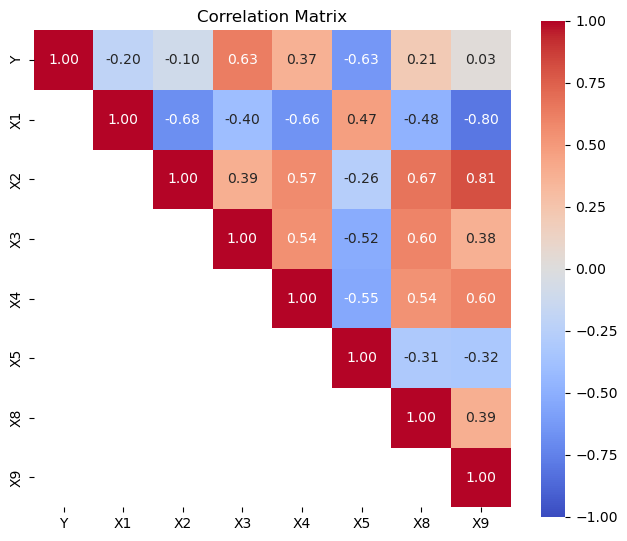

In [14]:
try:
    energy_cons_df = energy_cons_df.drop(columns=['X6', 'X7'])
except:
    print("The columns have been dropped already")
corr_matrix(energy_cons_df)

In [15]:
import statsmodels.api as sm

X = sm.add_constant( energy_cons_df.drop(columns='Y') )
y = energy_cons_df['Y']

X.head(), y.head()

(                 const   X1     X2   X3      X4    X5       X8    X9
 Observation No.                                                     
 1                 1.00 2.72  52.50 3.00 3461.85 10.10   973610 23.60
 2                 1.00 2.50  85.20 1.90 3840.19 13.10  2357060 52.60
 3                 1.00 2.82  84.70 4.00 3776.65 11.30  3231888 28.30
 4                 1.00 2.58  74.30 2.40 3394.93 18.50  1140062 41.00
 5                 1.00 2.46 249.70 7.90 4352.30  4.40  3560595 55.40,
 Observation No.
 1    707.60
 2    708.50
 3    721.60
 4    694.00
 5   1077.80
 Name: Y, dtype: float64)

In [16]:
ols_regressor = sm.OLS(endog=y, exog=X).fit()
print( ols_regressor.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     11.44
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           2.32e-07
Time:                        14:50:15   Log-Likelihood:                -246.99
No. Observations:                  42   AIC:                             510.0
Df Residuals:                      34   BIC:                             523.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        855.4365    331.549      2.580      0.0

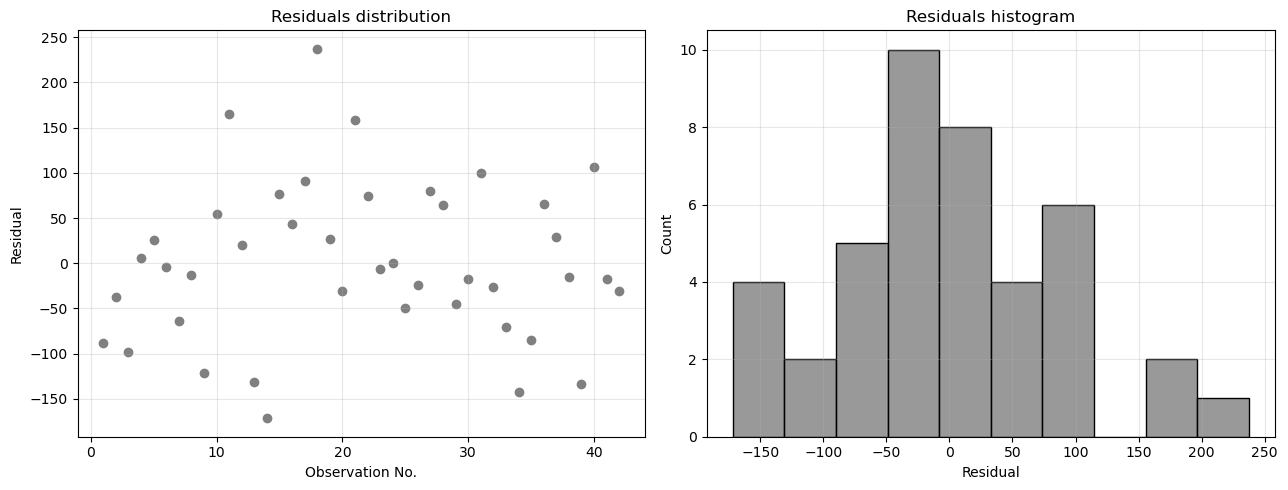

In [17]:
def residuals_visualization(ols_model):
    resid = ols_model.resid
    plt.figure(figsize=(13, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(x=range( 1, len(resid) + 1 ),
                y=resid,
                color='gray')
    plt.xlabel('Observation No.')
    plt.ylabel('Residual')
    plt.title('Residuals distribution')
    plt.grid(alpha=0.3)

    plt.subplot(1, 2, 2)
    sns.histplot(data=resid, 
                 edgecolor='black', 
                 alpha=0.8, 
                 color='gray',
                 bins=10)
    plt.xlabel('Residual')
    plt.title('Residuals histogram')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

residuals_visualization(ols_model=ols_regressor)

$$
Macierz \, H: \; H = X\left( X^{T}X \right)^{-1}X^{T}
$$

In [18]:
X_array = np.array(X)
"""@ matrix multiplying operator"""
H = X_array @ np.linalg.inv(X_array.T @ X_array) @ X_array.T
np.set_printoptions(threshold=np.inf)
H, H.shape

(array([[ 6.01326246e-02,  7.60299430e-03,  3.49187127e-02,
          7.83299846e-03,  7.24073118e-03,  4.92547138e-02,
         -1.18792752e-03, -6.71503260e-03,  5.77085628e-02,
          7.97048569e-02,  2.03748141e-02,  4.22862161e-02,
          4.93317104e-02, -1.89590795e-02,  5.35488331e-02,
          4.27118408e-02,  1.59595602e-02,  1.84955087e-02,
          4.71961535e-02,  3.18173253e-02,  4.51611121e-03,
          3.17637567e-02,  2.31419902e-02,  6.55883256e-03,
          1.40783209e-02,  9.94335337e-02,  1.09307717e-02,
          2.84101507e-02,  5.63017214e-02, -2.42682303e-02,
          2.25485695e-02,  6.09147024e-02, -2.83416914e-02,
          5.13505894e-02,  3.92272018e-02,  3.02775417e-02,
         -9.23952153e-03, -2.92017313e-03, -3.55446627e-02,
         -1.52358975e-03,  3.73036119e-02, -1.41756541e-02],
        [ 7.60299430e-03,  1.29639595e-01,  1.29060001e-02,
          7.14212849e-02, -9.09038415e-03,  6.71144315e-03,
          4.04952694e-02, -4.72224330e-

In [19]:
ols_regressor.resid.values, H.diagonal()

(array([-8.82970718e+01, -3.74016349e+01, -9.85205749e+01,  6.06926302e+00,
         2.56653177e+01, -4.42534533e+00, -6.41520781e+01, -1.26245125e+01,
        -1.21363522e+02,  5.39134055e+01,  1.65268841e+02,  2.05109958e+01,
        -1.31034282e+02, -1.71653942e+02,  7.64938166e+01,  4.34381376e+01,
         9.14129145e+01,  2.37291904e+02,  2.71265386e+01, -3.08815178e+01,
         1.58365819e+02,  7.42902466e+01, -6.07104582e+00, -7.49917343e-02,
        -4.95755402e+01, -2.46299121e+01,  7.97178344e+01,  6.44671799e+01,
        -4.46411074e+01, -1.70869636e+01,  9.94141276e+01, -2.67376380e+01,
        -7.02853626e+01, -1.42976354e+02, -8.48378356e+01,  6.55301694e+01,
         2.93785256e+01, -1.54769161e+01, -1.33291107e+02,  1.06105719e+02,
        -1.75636893e+01, -3.08578117e+01]),
 array([0.06013262, 0.12963959, 0.05347703, 0.0908357 , 0.14617338,
        0.09684721, 0.30585454, 0.22757652, 0.14696442, 0.17857068,
        0.08017422, 0.09810085, 0.12038324, 0.20158077, 0.34

##### Identyfikacja obserwacji nietypowych

In [20]:
table = pd.DataFrame(data={ 'Powiat': df_source['Powiat'],
                            'ei': ols_regressor.resid.values,
                            'hi': H.diagonal() },
                     index=np.arange( 1, len(H.diagonal()) + 1 ))
k = X.shape[1] - 1
n = len(energy_cons_df)
h_crit = 2 * (k + 1) / n
print(f'h_crit = {h_crit:.4f}')
table['h_crit'] = h_crit
table['ei * hi / (1 - hi)'] = table['ei'] * table['hi'] / (1 - table['hi'])

table['si'] = 0.0
for i in df_source.index:
    table.loc[i, 'si'] = table.loc[table.index != i, 'ei'].std()
table['ri'] = table['ei'] / (table['si'] * np.sqrt(1 - table['hi']))
table['DFFITS'] = table['ri'] * np.sqrt( table['hi'] / (1 - table['hi']) )
dffits_crit = 2 * np.sqrt((k + 1) / (n - k - 1))
table['DFFITS_crit'] = dffits_crit
table['is_leverage'] = np.where( table['hi'] >= h_crit, '* Yes *', 'No' )
table['is_influence'] = np.where( abs(table['DFFITS']) > dffits_crit, '* Yes *', 'No' )
# table['is_unusual'] = np.where( table['ri'] > 2, '* Yes *', 'No' )

table

h_crit = 0.3810


,Powiat,ei,hi,h_crit,ei * hi / (1 - hi),si,ri,DFFITS,DFFITS_crit,is_leverage,is_influence
1,Powiat białobrzeski,-88.30,0.06,0.38,-5.65,87.66,-1.04,-0.26,0.97,No,No
2,Powiat ciechanowski,-37.40,0.13,0.38,-5.57,88.59,-0.45,-0.17,0.97,No,No
3,Powiat garwoliński,-98.52,0.05,0.38,-5.57,87.38,-1.16,-0.28,0.97,No,No
4,Powiat gostyniński,6.07,0.09,0.38,0.61,88.78,0.07,0.02,0.97,No,No
5,Powiat grodziski,25.67,0.15,0.38,4.39,88.69,0.31,0.13,0.97,No,No
6,Powiat grójecki,-4.43,0.10,0.38,-0.47,88.79,-0.05,-0.02,0.97,No,No
7,Powiat kozienicki,-64.15,0.31,0.38,-28.27,88.19,-0.87,-0.58,0.97,No,No
8,Powiat legionowski,-12.62,0.23,0.38,-3.72,88.77,-0.16,-0.09,0.97,No,No
9,Powiat lipski,-121.36,0.15,0.38,-20.91,86.64,-1.52,-0.63,0.97,No,No
10,Powiat łosicki,53.91,0.18,0.38,11.72,88.37,0.67,0.31,0.97,No,No


##### Dobór zmiennych metodą regresji wstecz (narazie nic nie robię z obserwacjami nietypowymi)

In [21]:
def backward_regression(X, y, significance_level=0.05):
    X_selected = X.copy()
    i = 1
    while True:
        model = sm.OLS(endog=y, exog=X_selected).fit()
        print('\n' + 10*'=' + f' MODEL {i} ' + 10*'=')
        print( model.summary() )
        p_values = model.pvalues.drop(index='const') # exclude constant
        max_pval = p_values.max()
        
        if max_pval > significance_level:
            excluded_var = p_values.idxmax()
            print(excluded_var)
            print(f"Dropping variable: {excluded_var} (p = {max_pval:.4f})")
            X_selected = X_selected.drop(columns=excluded_var)
        else:
            break
        i += 1
    
    print("\nFinal Model:")
    print( model.summary() )
    return list( X_selected.drop(columns='const').columns ), model

sel_vars_v1, model_v1 = backward_regression(X=X, y=y)


========== MODEL 1 ==========
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     11.44
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           2.32e-07
Time:                        14:50:16   Log-Likelihood:                -246.99
No. Observations:                  42   AIC:                             510.0
Df Residuals:                      34   BIC:                             523.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        855.4365

In [22]:
print(sel_vars_v1)
energy_cons_final_v1 = energy_cons_df[['Y', *sel_vars_v1]]
energy_cons_final_v1.head()

['X2', 'X3', 'X5']


,Y,X2,X3,X5
Observation No.,,,,
1,707.60,52.50,3.00,10.10
2,708.50,85.20,1.90,13.10
3,721.60,84.70,4.00,11.30
4,694.00,74.30,2.40,18.50
5,1077.80,249.70,7.90,4.40


In [23]:
print( model_v1.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           1.16e-09
Time:                        14:50:17   Log-Likelihood:                -248.09
No. Observations:                  42   AIC:                             504.2
Df Residuals:                      38   BIC:                             511.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        825.5767     57.887     14.262      0.0

#### Analiza czynnika inflacji wariancji do zbadania współiniowości zmiennych objaśniających
$$ VIF_i = \frac{1}{1 - {R_i}^2} \;\;\;\;\;\;\; i = 1, 2 ... k $$

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(numerical_data):    
     X = numerical_data 
     X_with_const = sm.add_constant(X)

     VIFs = pd.DataFrame(
               data=[variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])],
               index=X_with_const.columns,
               columns=['VIF']
     )
     return VIFs


VIF( energy_cons_final_v1.drop(columns='Y') )

,VIF
const,16.10
X2,1.19
X3,1.52
X5,1.38


In [25]:
def show_selected_vars_description(selected_vars, vars_descr_dict):
    for v in vars_descr_dict.items():
        if v[0] in selected_vars:
            print(f'{v[0]} - {v[1]}')
            
show_selected_vars_description(selected_vars=sel_vars_v1, vars_descr_dict=vars_descr_dict)

X2 - ludność na 1 km2 [os/km2]
X3 - mieszkania oddane do użytkowania na 1000 ludności [-]
X5 - stopa bezrobocia rejestrowanego [%]


In [26]:
X_final1 = sm.add_constant( energy_cons_final_v1.drop(columns='Y') ) 
y_final1 = energy_cons_final_v1['Y']

final_model_v1 = sm.OLS(endog=y_final1, exog=X_final1).fit()
print( final_model_v1.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           1.16e-09
Time:                        14:50:17   Log-Likelihood:                -248.09
No. Observations:                  42   AIC:                             504.2
Df Residuals:                      38   BIC:                             511.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        825.5767     57.887     14.262      0.0

#### Badanie istotności parametrów
$$ H_0: {\beta_i = 0} \\
   H_1: {\beta_i \neq 0} $$

In [27]:
def model_pvalues(model):
    for index, val in model.pvalues.items():
        print(f'{index} - p-value = {val:.8f}')

model_pvalues(final_model_v1)

const - p-value = 0.00000000
X2 - p-value = 0.00008480
X3 - p-value = 0.00001089
X5 - p-value = 0.00014130


$$ \text{Dla wszystkich zmiennych p-value < 0.05 więc odrzucamy } H_0 \text{ na rzecz } H_1 $$

$$ \text{Wyznaczenie odchylenia standardowego reszt  } S_{e} = \sqrt{\frac{e_{i}^2}{n-k-1}} \text{  i współczynnika korelacji wielorakiej } R = \sqrt{R^2} $$

In [28]:
print( final_model_v1.summary() )
print(f'Errors standard deviation: {np.sqrt( final_model_v1.mse_resid ):.3f}')
print(f'R-squared: {final_model_v1.rsquared:.3f}')
print(f'Multiple correlation coefficient - sqrt(R-squred): {np.sqrt( final_model_v1.rsquared ):.3f}')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           1.16e-09
Time:                        14:50:17   Log-Likelihood:                -248.09
No. Observations:                  42   AIC:                             504.2
Df Residuals:                      38   BIC:                             511.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        825.5767     57.887     14.262      0.0

#### Interpretacja:
- $ S_{e} = 93,501 $ => przeciętna różnica między wartością przewidywaną a rzeczywistą zużycia energii elektrycznej na 1 mieszkańca wynosi 93,501 kWh
- $ R^{2} = 0,686 $ => około 69 % całkowitej zmienności zostało wyjaśnione przez model (dosyć dobre dopasowanie)
- $ R = \sqrt{R^{2}} = 0,828 $ => wartości prognozowane i empiryczne zużycia energii elektrycznej na 1 mieszkańca są ze sobą skorelowane w stopniu około 0,828 (dość wysoki poziom korelacji)

#### Badanie losowości reszt
$$ E(\epsilon)=0 $$

In [29]:
final_model_v1.resid.values.mean()

-3.789561257387201e-14

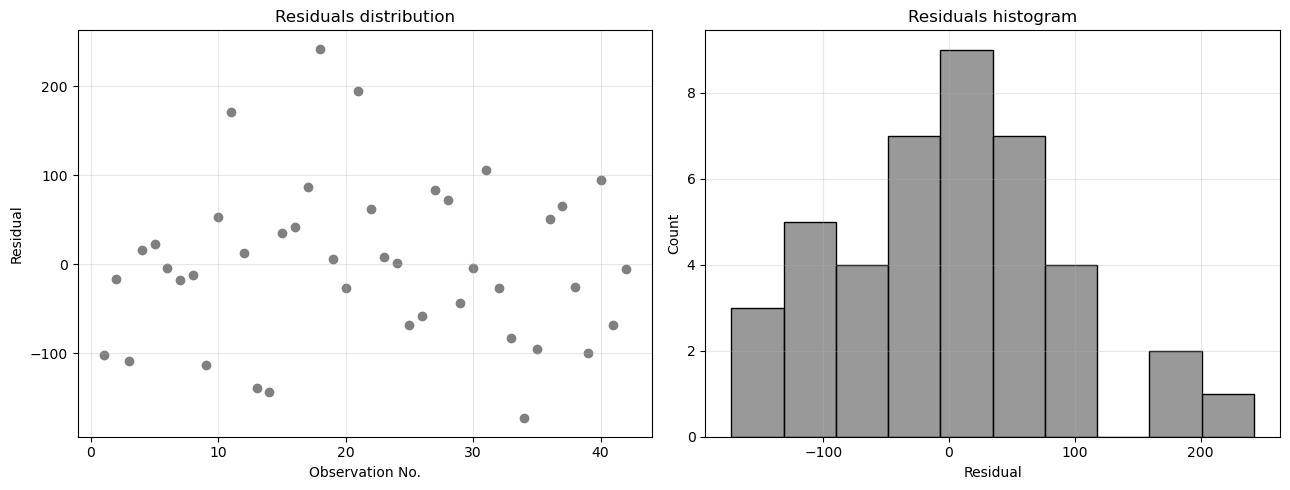

In [30]:
residuals_visualization(ols_model=final_model_v1)

#### Test serii
$$ H_0: \text{Reszty modelu są losowe} \\[6pt]
   H_1: \text{Reszty modelu nie są losowe} $$

##### Losowość reszt weryfikujemy za pomocą statystyki Z:
$$ Z = \frac{s - E(s)}{D(s)} \\ 
   E(s) = \frac{2 n_1 n_2}{n} + 1; \; \; \; \; \; \;
   D^2(s) = \frac{2 n_1 n_2 \cdot (2 n_1 n_2 - n)}{(n-1) n^2} $$

In [31]:
from scipy.stats import norm 

def runs_test(model, alpha=0.05):
    resid = model.resid.values
    print('Residuals:')
    print(resid)

    # liczba dodatnich i ujemnych reszt
    n1 = len( resid[resid > 0] ) 
    n2 = len( resid[resid < 0] )
    n = len(resid)
    
    print(f'\nn = {n}, n1 = {n1}, n2 = {n2}')
    s = 1 # liczba serii
    for i in range( 1, len(resid) ):
        if resid[i-1] * resid[i] < 0:
            s += 1

    def Z_score(s, n1, n2):
        n = n1 + n2
        E_s = (2 * n1 * n2 / n) + 1
        D2_s = (2 * n1 * n2) * (2 * n1 * n2 - n) / ( (n - 1) * n**2 )
        Z = (s - E_s) / np.sqrt(D2_s)
        return Z
      
    Z = Z_score(s=s, n1=n1, n2=n2)
    z_crit = norm.ppf(1 - alpha/2)
    print(f'Z statistic = {Z:.4f}')
    print(f'Critcal value Z_crit = {z_crit:.4f}')
    return Z, z_crit

Z_v1, Z_crit = runs_test(model=final_model_v1)
Z_v1, Z_crit

Residuals:
[-102.07902983  -16.84054058 -108.89892548   16.64807442   22.74651664
   -3.78608865  -17.20370988  -12.4163408  -113.50211934   52.87984306
  171.58151821   12.91705899 -138.99628581 -143.63555316   35.42589129
   41.67166465   87.30284823  242.20241358    6.11249279  -26.3169306
  195.34947338   62.76360458    8.17572927    2.11669042  -67.88945975
  -57.72472584   83.72517953   71.99443506  -43.39902925   -4.13380674
  106.0662775   -26.65372757  -82.9222144  -172.85001403  -94.93791414
   51.41487076   65.97998997  -25.26669645  -99.9848932    94.84233161
  -67.52780535   -4.95109308]

n = 42, n1 = 20, n2 = 22
Z statistic = -1.5509
Critcal value Z_crit = 1.9600


(-1.550929004416759, 1.959963984540054)

In [32]:
from statsmodels.sandbox.stats.runs import runstest_1samp

Z_v1, p_value = runstest_1samp(final_model_v1.resid.values,
                               cutoff=0,
                               correction=False)
print(f'Z statistic: {Z_v1}, p-value: {p_value}')

Z statistic: -1.550929004416759, p-value: 0.12091869871492428


$$ \left(|Z| \leq 1,96 \text{ <=> p-value} > 0,05 \right) \; => \; \text{Brak podstaw do odrzucenia } H_0 => \text{Reszty modelu są losowe} $$

#### Badanie normalności
$$ H_0: \text{Składnik losowy modelu ma rozkład normalny} \\[6pt]
   H_1: \text{Składnik losowy modelu nie ma rozkładu normalnego} \\[6pt]
   W = \frac{ \left[ \sum_{i=1}^{\frac{n}{2}} a_{n,i} \cdot (e_{(n-i+1)}-e_{(i)}) \right]^2 }{\sum_{i=1}^{n}{e_i^2}}  $$

In [33]:
from scipy.stats import shapiro

sw_stat_v1, sw_p_value_v1 = shapiro(x=final_model_v1.resid.values)
print(f'Shapiro-Wilk statistic: {sw_stat_v1:.4f},  p-value: {sw_p_value_v1:.4f}')

Shapiro-Wilk statistic: 0.9768,  p-value: 0.5414


$$ \text{p-value > 0.05 więc brak podstaw do odrzucenia } H_0 \text{ => Składnik losowy ma rozkład normalny} $$

#### Badanie autokorelacji składnika losowego
$$ DW = \frac{\sum_{i=2}^{n}(e_i - e_{i-1})^2}{\sum_{i=1}^{n} e_i^2} $$

In [34]:
# sorting residuals by one of the explanatory variable to simulate ordered sequence of observations
residuals_sorted_v1 = energy_cons_final_v1.copy()
residuals_sorted_v1['ei'] = final_model_v1.resid
residuals_sorted_v1 = residuals_sorted_v1.sort_values(by='X2')
residuals_sorted_v1

,Y,X2,X3,X5,ei
Observation No.,,,,,
10,833.00,40.80,1.60,8.20,52.88
15,821.40,42.30,3.70,14.20,35.43
11,840.40,43.00,2.30,19.10,171.58
22,833.50,43.50,2.60,12.00,62.76
9,633.60,47.10,2.20,12.60,-113.50
29,781.60,48.50,2.70,8.00,-43.40
36,762.10,49.10,2.80,17.30,51.41
26,782.50,50.90,2.90,7.40,-57.72
1,707.60,52.50,3.00,10.10,-102.08


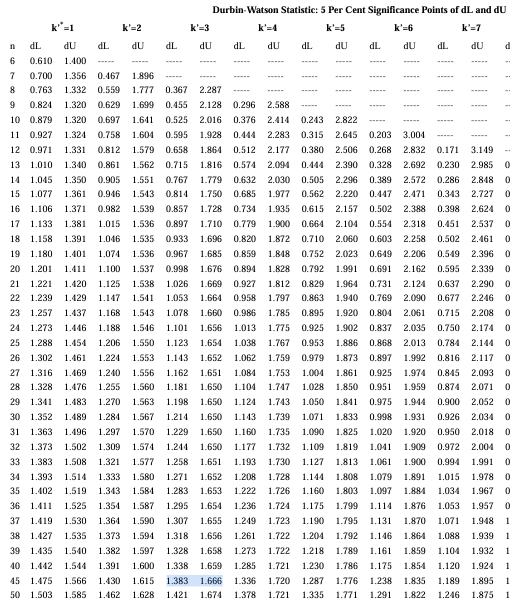

In [35]:
from statsmodels.stats.stattools import durbin_watson

n_v1 = 42; k_v1 = 3; alpha = 0.05
dL_v1 = 1.383; dU_v1 = 1.666
DW_v1 = durbin_watson( residuals_sorted_v1['ei'] )
print(f'Durbin-Watson statistic: {DW_v1:.4f}')

Durbin-Watson statistic: 1.9370


$$ \text{DW < 2 więc sprawdzamy występowanie autokorelacji dodatniej} \\[6pt]
   H_0: \hat{\rho} = 0 \text{ (brak autokorelacji)} \\[6pt]
   H_1: \hat{\rho} > 0 \text{ (autokorelacja dodatnia)} $$

In [36]:
print(f'Durbin-Watson statistic: {DW_v1:.3f}')
print(f'Critical values: dL = {dL_v1}, dU = {dU_v1} (n={n_v1}, k={k_v1}, alpha={alpha})')

Durbin-Watson statistic: 1.937
Critical values: dL = 1.383, dU = 1.666 (n=42, k=3, alpha=0.05)


$$ \text{Wartość statystyki } DW > d_U \text{ czyli brak podstaw do odrzucenia } H_0 \text{ (brak autokorelacji składnika losowego)} $$

$$ %\text{Wartość DW znajduje się w przedziale } [d_L, d_U] \text{ czyli statystyka DW nie rozstrzyga czy występuje autokorelacja składnika losowego.} \\[6pt] %
   \text{Test Breuscha-Godfreya:} \\[6pt]
   H_0: \hat{\rho} = 0 \text{ (brak autokorelacji)} \\[6pt]
   H_1: \hat{\rho} \neq 0 \text{ (występuje autokorelacja)} $$

In [37]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

BG_lm, BG_lm_pval, _, _ = acorr_breusch_godfrey(res=final_model_v1, nlags=1)
print(f'Breusch-Godfrey statistic: {BG_lm:.4f}, p-value: {BG_lm_pval:.4f}')

Breusch-Godfrey statistic: 2.0749, p-value: 0.1497


$$ \text{p-value > 0.05 czyli brak podstaw do odrzucenia } H_0 \text{ => Brak autokorelacji składnika losowego} $$

#### Badanie homoskedastyczności
$$ H_0: \, \sigma_i^2 = \sigma^2 \text{ dla wszystkich } i=1,...,n \text{ (homoskedastyczność)} \\[6pt]
   H_1: \, \sigma_i^2 = \sigma^2 \text{ nie dla wszystkich } i=1,...,n \text{ (heteroskedastyczność)} \\[6pt]
   LM = n R^{2} $$

In [38]:
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

lm_stat_v1, lm_pvalue_v1, _, _ = het_white(resid=final_model_v1.resid.values, exog=final_model_v1.model.exog) 
print(f'White test, LM statistic: {lm_stat_v1:.4f}, p-value: {lm_pvalue_v1:.4f}')

White test, LM statistic: 10.2921, p-value: 0.3274


$$ \text{p-value > 0.05 więc brak podstaw do odrzucenia } H_0 \text{ => Składnik losowy jest homoskedastyczny } $$

In [39]:
print( final_model_v1.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           1.16e-09
Time:                        14:50:17   Log-Likelihood:                -248.09
No. Observations:                  42   AIC:                             504.2
Df Residuals:                      38   BIC:                             511.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        825.5767     57.887     14.262      0.0

In [40]:
show_selected_vars_description(selected_vars=sel_vars_v1, vars_descr_dict=vars_descr_dict)

X2 - ludność na 1 km2 [os/km2]
X3 - mieszkania oddane do użytkowania na 1000 ludności [-]
X5 - stopa bezrobocia rejestrowanego [%]


$ \hat{Y} = 825,58 - 0,1 X_{2} + 39,16 X_{3} - 12,71 X_{5} $
#### Interpretacja parametrów (Model 1)
$ 
\beta_2 \text{ - przy wzroście liczby ludności na } 1km^2 \text{ o jednostkę zużycie energii na 1 mieszkańca} \\ \qquad 
\text{zmaleje średnio o 0.1 kWh przy założeniu ceteris paribus} \\
\beta_3 \text{ - przy wzroście liczby mieszkań oddanych do użytkowania na 1000 ludności o jednostkę zużycie energii na 1 mieszkańca} \\ \qquad
\text{wzrośnie średnio o 39.16 kWh przy założeniu ceteris paribus} \\ 
\beta_5 \text{ - przy wzroście rejestrowanej stopy bezrobocia o 1\% zużycie energii elektrycznej na 1 mieszkańca} \\ \qquad 
\text{zmaleje średnio o 12.71 kWh przy założeniu ceteris paribus} \\
$

In [41]:
table

,Powiat,ei,hi,h_crit,ei * hi / (1 - hi),si,ri,DFFITS,DFFITS_crit,is_leverage,is_influence
1,Powiat białobrzeski,-88.30,0.06,0.38,-5.65,87.66,-1.04,-0.26,0.97,No,No
2,Powiat ciechanowski,-37.40,0.13,0.38,-5.57,88.59,-0.45,-0.17,0.97,No,No
3,Powiat garwoliński,-98.52,0.05,0.38,-5.57,87.38,-1.16,-0.28,0.97,No,No
4,Powiat gostyniński,6.07,0.09,0.38,0.61,88.78,0.07,0.02,0.97,No,No
5,Powiat grodziski,25.67,0.15,0.38,4.39,88.69,0.31,0.13,0.97,No,No
6,Powiat grójecki,-4.43,0.10,0.38,-0.47,88.79,-0.05,-0.02,0.97,No,No
7,Powiat kozienicki,-64.15,0.31,0.38,-28.27,88.19,-0.87,-0.58,0.97,No,No
8,Powiat legionowski,-12.62,0.23,0.38,-3.72,88.77,-0.16,-0.09,0.97,No,No
9,Powiat lipski,-121.36,0.15,0.38,-20.91,86.64,-1.52,-0.63,0.97,No,No
10,Powiat łosicki,53.91,0.18,0.38,11.72,88.37,0.67,0.31,0.97,No,No


Ta sama procedura dla danych z uwzględnieniem zmiennej 0-1 określającej czy mamy do czynienia z powiatem Miasto Stołeczne Warszawa

In [42]:
energy_cons_df_v2 = df_source.drop(columns='Powiat').copy()
energy_cons_df_v2['X_Warszawa - czy Powiat Miasto Stołeczne Warszawa'] = np.where(df_source['Powiat'] == 'Powiat m. st. Warszawa', 1, 0)
energy_cons_df_v2

,Y - zużycie energii elektrycznej na 1 mieszkańca [kWh],X1 - przeciętna liczba osób na 1 mieszkanie [os],X2 - ludność na 1 km2 [os/km2],X3 - mieszkania oddane do użytkowania na 1000 ludności [-],X4 - przeciętne miesięczne wynagrodzenie brutto [zł],X5 - stopa bezrobocia rejestrowanego [%],X6 - ludność w wieku 15-34 [os],X7 - liczba mieszkań [-],X8 - powierzchnia użytkowa mieszkań [m2],X9 - wskaźnik urbanizacji [%],X_Warszawa - czy Powiat Miasto Stołeczne Warszawa
Observation No.,,,,,,,,,,,
1,707.60,2.72,52.50,3.00,3461.85,10.10,9725,11833,973610,23.60,0
2,708.50,2.50,85.20,1.90,3840.19,13.10,24902,31131,2357060,52.60,0
3,721.60,2.82,84.70,4.00,3776.65,11.30,31822,34836,3231888,28.30,0
4,694.00,2.58,74.30,2.40,3394.93,18.50,12186,16198,1140062,41.00,0
5,1077.80,2.46,249.70,7.90,4352.30,4.40,22364,35319,3560595,55.40,0
6,968.20,2.49,77.70,5.00,4133.21,3.30,25605,36565,3239850,35.10,0
7,729.40,2.54,66.60,2.30,4930.22,12.80,16801,22088,1884398,29.00,0
8,979.40,2.38,292.80,8.50,3975.24,10.90,27406,44131,4513662,51.10,0
9,633.60,2.52,47.10,2.20,3567.68,12.60,9296,13264,1091815,16.30,0


In [43]:
vars = [colname.split(" - ", 1)[0] for colname in energy_cons_df_v2.columns]
vars_description = [colname.split(" - ", 1)[1] for colname in energy_cons_df_v2.columns]
vars_descr_dict = dict( zip(vars, vars_description) )
vars, vars_description

(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X_Warszawa'],
 ['zużycie energii elektrycznej na 1 mieszkańca [kWh]',
  'przeciętna liczba osób na 1 mieszkanie [os]',
  'ludność na 1 km2 [os/km2]',
  'mieszkania oddane do użytkowania na 1000 ludności [-]',
  'przeciętne miesięczne wynagrodzenie brutto [zł]',
  'stopa bezrobocia rejestrowanego [%]',
  'ludność w wieku 15-34 [os]',
  'liczba mieszkań [-]',
  'powierzchnia użytkowa mieszkań [m2]',
  'wskaźnik urbanizacji [%]',
  'czy Powiat Miasto Stołeczne Warszawa'])

In [44]:
energy_cons_df_v2.columns = vars
energy_cons_df_v2.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X_Warszawa
Observation No.,,,,,,,,,,,
1,707.60,2.72,52.50,3.00,3461.85,10.10,9725,11833,973610,23.60,0
2,708.50,2.50,85.20,1.90,3840.19,13.10,24902,31131,2357060,52.60,0
3,721.60,2.82,84.70,4.00,3776.65,11.30,31822,34836,3231888,28.30,0
4,694.00,2.58,74.30,2.40,3394.93,18.50,12186,16198,1140062,41.00,0
5,1077.80,2.46,249.70,7.90,4352.30,4.40,22364,35319,3560595,55.40,0


In [45]:
# dropping X6 and X7 because of high correlation based on correlation matrix analysis done earlier in the notebook
try:
    energy_cons_df_v2 = energy_cons_df_v2.drop(columns=['X6', 'X7']) 
except:
    print("The columns have been dropped already")
energy_cons_df_v2.head()

,Y,X1,X2,X3,X4,X5,X8,X9,X_Warszawa
Observation No.,,,,,,,,,
1,707.60,2.72,52.50,3.00,3461.85,10.10,973610,23.60,0
2,708.50,2.50,85.20,1.90,3840.19,13.10,2357060,52.60,0
3,721.60,2.82,84.70,4.00,3776.65,11.30,3231888,28.30,0
4,694.00,2.58,74.30,2.40,3394.93,18.50,1140062,41.00,0
5,1077.80,2.46,249.70,7.90,4352.30,4.40,3560595,55.40,0


In [46]:
X_v2 = sm.add_constant( energy_cons_df_v2.drop(columns='Y') )
y_v2 = energy_cons_df_v2['Y']

sel_vars_v2, model_v2 = backward_regression(X=X_v2, y=y_v2)


========== MODEL 1 ==========
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     14.13
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           1.13e-08
Time:                        14:50:18   Log-Likelihood:                -241.17
No. Observations:                  42   AIC:                             500.3
Df Residuals:                      33   BIC:                             516.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        940.5742

In [47]:
print(sel_vars_v2)
energy_cons_final_v2 = energy_cons_df_v2[['Y', *sel_vars_v2]]
energy_cons_final_v2.head()

['X2', 'X5', 'X8', 'X_Warszawa']


,Y,X2,X5,X8,X_Warszawa
Observation No.,,,,,
1,707.60,52.50,10.10,973610,0
2,708.50,85.20,13.10,2357060,0
3,721.60,84.70,11.30,3231888,0
4,694.00,74.30,18.50,1140062,0
5,1077.80,249.70,4.40,3560595,0


In [48]:
print( model_v2.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     26.00
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           2.61e-10
Time:                        14:50:18   Log-Likelihood:                -244.32
No. Observations:                  42   AIC:                             498.6
Df Residuals:                      37   BIC:                             507.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        861.7674     47.194     18.260      0.0

In [49]:
show_selected_vars_description(selected_vars=sel_vars_v2, vars_descr_dict=vars_descr_dict)

X2 - ludność na 1 km2 [os/km2]
X5 - stopa bezrobocia rejestrowanego [%]
X8 - powierzchnia użytkowa mieszkań [m2]
X_Warszawa - czy Powiat Miasto Stołeczne Warszawa


#### Badanie współliniowości

In [50]:
VIF( energy_cons_final_v2.drop(columns='Y') )

,VIF
const,12.47
X2,1.83
X5,1.28
X8,52.01
X_Warszawa,49.21


#### Dla dwóch zmiennych wartość VIF znacznie przekracza 10, więc jedna z nich zostaje usunięta

In [51]:
try:
    energy_cons_final_v2 = energy_cons_final_v2.drop(columns='X8')
    sel_vars_v2.remove('X8')
except:
    print("The columns have been removed already")
print(sel_vars_v2)
energy_cons_final_v2.head()

['X2', 'X5', 'X_Warszawa']


,Y,X2,X5,X_Warszawa
Observation No.,,,,
1,707.60,52.50,10.10,0
2,708.50,85.20,13.10,0
3,721.60,84.70,11.30,0
4,694.00,74.30,18.50,0
5,1077.80,249.70,4.40,0


In [52]:
VIF( energy_cons_final_v2.drop(columns='Y') )

,VIF
const,6.38
X2,1.79
X5,1.08
X_Warszawa,1.78


In [53]:
X_final2 = sm.add_constant( energy_cons_final_v2.drop(columns='Y') )
y_final2 = energy_cons_final_v2['Y']

final_model_v2 = sm.OLS(endog=y_final2, exog=X_final2).fit()
print( final_model_v2.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     12.62
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           7.19e-06
Time:                        14:50:18   Log-Likelihood:                -257.90
No. Observations:                  42   AIC:                             523.8
Df Residuals:                      38   BIC:                             530.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.0720     46.016     22.885      0.0

#### Badanie istotności parametrów
$$ H_0: {\beta_i = 0} \\
   H_1: {\beta_i \neq 0} $$

In [54]:
model_pvalues(final_model_v2)

const - p-value = 0.00000000
X2 - p-value = 0.01038454
X5 - p-value = 0.00000123
X_Warszawa - p-value = 0.17701904



$$ 
    \text{Dla zmiennych } X_2 \text{ i } X_5 \text{ p-value < 0.05 więc odrzucamy } H_0 \text{ na rzecz } H_1 \text{ ale dla zmiennej } X_{Warszawa} \\ \text{ p-value > 0.05 więc brak podstaw do odrzucenia } H_0 \text{ czyli odrzucamy zmienną } X_{Warszawa} \text{ z modelu } 
$$

In [55]:
try:
    energy_cons_final_v2 = energy_cons_final_v2.drop(columns='X_Warszawa')
    sel_vars_v2.remove('X_Warszawa')
except:
    print("The columns have been removed already")
print(sel_vars_v2)
energy_cons_final_v2.head()

['X2', 'X5']


,Y,X2,X5
Observation No.,,,
1,707.60,52.50,10.10
2,708.50,85.20,13.10
3,721.60,84.70,11.30
4,694.00,74.30,18.50
5,1077.80,249.70,4.40


In [56]:
X_final2 = sm.add_constant( energy_cons_final_v2.drop(columns='Y') )
y_final2 = energy_cons_final_v2['Y']

final_model_v2 = sm.OLS(endog=y_final2, exog=X_final2).fit()
print( final_model_v2.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     17.58
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           3.62e-06
Time:                        14:50:18   Log-Likelihood:                -258.92
No. Observations:                  42   AIC:                             523.8
Df Residuals:                      39   BIC:                             529.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.3450     46.539     22.634      0.0

$$ \text{Dla ostatecznego modelu wszystkie zmienne (} X_2 \text{ i } X_5 \text{) są istotne statystycznie }

$$ \text{Wyznaczenie odchylenia standardowego reszt  } S_{e} = \sqrt{\frac{e_{i}^2}{n-k-1}} \text{  i współczynnika korelacji wielorakiej } R = \sqrt{R^2} $$

In [57]:
print( final_model_v2.summary() )
print(f'Errors standard deviation: {np.sqrt( final_model_v2.mse_resid ):.3f}')
print(f'R-squared: {final_model_v2.rsquared:.3f}')
print(f'Multiple correlation coefficient - sqrt(R-squred): {np.sqrt( final_model_v2.rsquared ):.3f}')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     17.58
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           3.62e-06
Time:                        14:50:18   Log-Likelihood:                -258.92
No. Observations:                  42   AIC:                             523.8
Df Residuals:                      39   BIC:                             529.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.3450     46.539     22.634      0.0

#### Interpretacja:
- $ S_{e} = 119,437 $ => przeciętna różnica między wartością przewidywaną a rzeczywistą zużycia energii elektrycznej na 1 mieszkańca wynosi 119,437 kWh
- $ R^{2} = 0,474 $ => około 47 % całkowitej zmienności zostało wyjaśnione przez model (raczej słabe dopasowanie)
- $ R = \sqrt{R^{2}} = 0,689 $ => wartości prognozowane i empiryczne zużycia energii elektrycznej na 1 mieszkańca są ze sobą skorelowane w stopniu około 0,69 (dość średni poziom korelacji)

#### Badanie losowości reszt
$$ E(\epsilon)=0 $$

In [58]:
final_model_v2.resid.values.mean()

7.985146935208745e-13

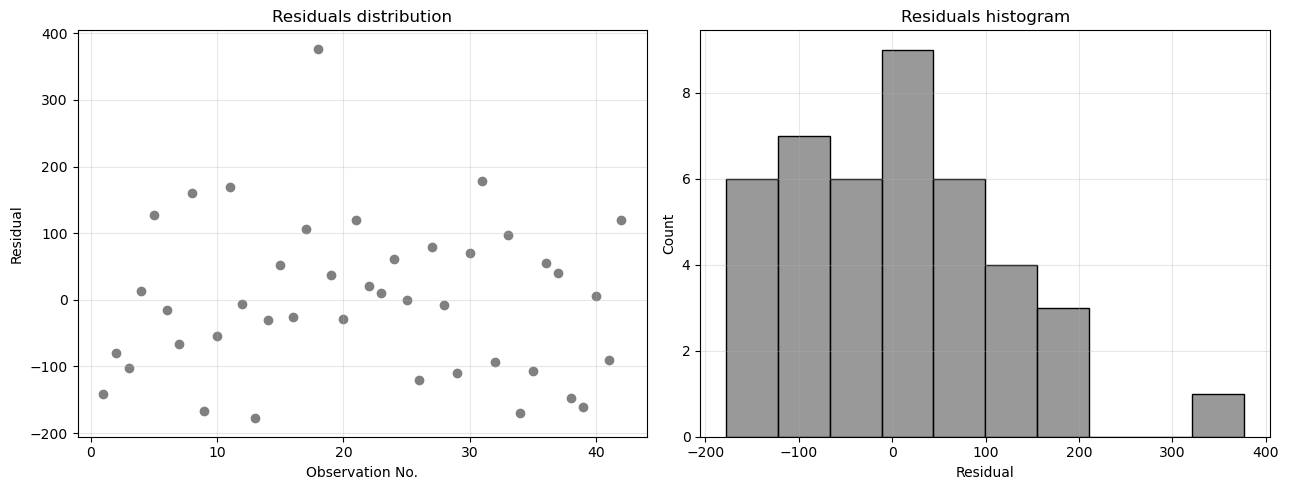

In [59]:
residuals_visualization(ols_model=final_model_v2)

#### Test serii
$$ H_0: \text{Reszty modelu mają rozkład losowy} \\[6pt]
   H_1: \text{Reszty modelu nie mają rozkładu losowego} $$

In [60]:
Z_v2, Z_crit = runs_test(final_model_v2)
Z_v2, Z_crit

Residuals:
[-141.85698435  -79.33804954 -102.02670033   12.76087327  127.30847306
  -14.78291057  -65.54821424  160.69962723 -166.52751033  -54.92497616
  169.14398293   -6.16938781 -177.72345894  -30.71558462   52.76021694
  -26.08367036  105.67047368  376.79140324   37.0514796   -29.00068043
  120.13848089   21.23056294    9.77949282   60.91171732   -0.57616337
 -120.69253918   78.8727048    -7.76603886 -109.82175578   70.90562939
  179.05659147  -92.86705895   97.71794418 -170.05302282 -106.43208012
   55.46358981   39.95075781 -147.75252258 -160.58189468    5.18483486
  -90.42047671  120.26284448]

n = 42, n1 = 20, n2 = 22
Z statistic = 0.6412
Critcal value Z_crit = 1.9600


(0.6412494922107752, 1.959963984540054)

In [61]:
Z_v2, p_value = runstest_1samp(final_model_v2.resid.values,
                               cutoff=0,
                               correction=False)
print(f'Z statistic: {Z_v2}, p-value: {p_value}')

Z statistic: 0.6412494922107752, p-value: 0.521360598774644


$$ \left(|Z| \leq 1,96 \text{ <=> p-value > 0,05 }\right) => \; \text{Brak podstaw do odrzucenia } H_0 => \; \text{Reszty modelu są losowe} $$

#### Badanie normalności
$$ H_0: \text{Składnik losowy modelu ma rozkład normalny} \\[6pt]
   H_1: \text{Składnik losowy modelu nie ma rozkładu normalnego} \\[6pt]
   W = \frac{ \left[ \sum_{i=1}^{\frac{n}{2}} a_{n,i} \cdot (e_{(n-i+ 1)}-e_{(i)}) \right]^2 }{\sum_{i=1}^{n}{e_i^2}} $$

In [62]:
sw_stat_v2, sw_p_value_v2 = shapiro(x=final_model_v2.resid.values)
print(f'Shapiro-Wilk statistic: {sw_stat_v2:.4f},  p-value: {sw_p_value_v2:.4f}')

Shapiro-Wilk statistic: 0.9554,  p-value: 0.1013


$$ \text{p-value > 0.05 więc brak podstaw do odrzucenia } H_0 \; => \text{Składnik losowy ma rozkład normalny} $$

#### Badanie autokorelacji składnika losowego
$$ DW = \frac{\sum_{i=2}^{n}(e_i - e_{i-1})^2}{\sum_{i=1}^{n} e_i^2} $$

In [63]:
# sorting residuals by one of the explanatory variable to simulate ordered sequence of observations
residuals_sorted_v2 = energy_cons_final_v2.copy()
residuals_sorted_v2['ei'] = final_model_v2.resid
residuals_sorted_v2 = residuals_sorted_v2.sort_values(by='X2')
residuals_sorted_v2

,Y,X2,X5,ei
Observation No.,,,,
10,833.00,40.80,8.20,-54.92
15,821.40,42.30,14.20,52.76
11,840.40,43.00,19.10,169.14
22,833.50,43.50,12.00,21.23
9,633.60,47.10,12.60,-166.53
29,781.60,48.50,8.00,-109.82
36,762.10,49.10,17.30,55.46
26,782.50,50.90,7.40,-120.69
1,707.60,52.50,10.10,-141.86


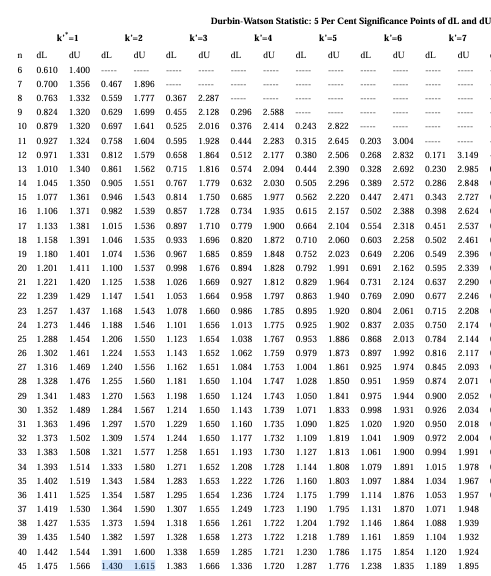

In [64]:
from statsmodels.stats.stattools import durbin_watson

n_v2 = 42; k_v2 = 2; alpha = 0.05
dL_v2 = 1.430; dU_v2 = 1.615
DW_v2 = durbin_watson(final_model_v2.resid)
print(f'Durbin-Watson statistic: {DW_v2:.4f}')

Durbin-Watson statistic: 1.9125


#### DW < 2 więc sprawdzamy występowanie autokorelacji dodatniej
$$ H_0: \hat{\rho} = 0 \text{ (brak autokorelacji)} \\[6pt]
   H_1: \hat{\rho} > 0 \text{ (autokorelacja dodatnia)} \\ $$

In [65]:
print(f'Durbin-Watson statistic: {DW_v2:.3f}')
print(f'Critical values: dL = {dL_v2}, dU = {dU_v2} (n={n_v2}, k={k_v2}, alpha={alpha})')

Durbin-Watson statistic: 1.912
Critical values: dL = 1.43, dU = 1.615 (n=42, k=2, alpha=0.05)


$$ \text{Wartość statystyki } DW > d_U \text{ czyli brak podstaw do odrzucenia } H_0 \text{ (brak autokorelacji składnika losowego)} $$

#### Badanie homoskedastyczności
$$ H_0: \, \sigma_i^2 = \sigma^2 \text{ dla wszystkich } i=1,...,n \text{ (homoskedastyczność)} \\[6pt]
   H_1: \, \sigma_i^2 = \sigma^2 \text{ nie dla wszystkich } i=1,...,n \text{ (heteroskedastyczność)} \\[6pt]
   LM = n R^{2} $$

In [66]:
lm_stat_v2, lm_pvalue_v2, _, _ = het_white(resid=final_model_v2.resid.values, exog=final_model_v2.model.exog) 
print(f'White test, LM statistic: {lm_stat_v2:.4f}, LM p-value: {lm_pvalue_v2:.4f}')

White test, LM statistic: 6.2455, LM p-value: 0.2831


In [67]:
lm_stat_v2, lm_pvalue_v2, _, _  = het_breuschpagan(resid=final_model_v2.resid.values, exog_het=final_model_v2.model.exog)
print(f'Breusch-Pagan test, LM statistic: {lm_stat_v2:.4f}, LM p-value: {lm_pvalue_v2:.4f}')

Breusch-Pagan test, LM statistic: 3.5750, LM p-value: 0.1674


$$ \text{p-value > 0.05 więc brak podstaw do odrzucenia } H_0 \text{ => Składnik losowy jest homoskedastyczny } $$

In [68]:
print( final_model_v2.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     17.58
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           3.62e-06
Time:                        14:50:19   Log-Likelihood:                -258.92
No. Observations:                  42   AIC:                             523.8
Df Residuals:                      39   BIC:                             529.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.3450     46.539     22.634      0.0

In [69]:
show_selected_vars_description(selected_vars=sel_vars_v2, vars_descr_dict=vars_descr_dict)

X2 - ludność na 1 km2 [os/km2]
X5 - stopa bezrobocia rejestrowanego [%]


$ \hat{Y} = 1053,35 - 0,06 X_{2} - 19,87 X_5 $
#### Interpretacja parametrów (Model 2)
$ 
\beta_2 \text{ - przy wzroście liczby ludności na } 1km^2 \text{ o jednostkę zużycie energii na 1 mieszkańca} \\ \qquad 
\text{zmaleje średnio o 0.06 kWh przy założeniu ceteris paribus} \\
\beta_5 \text{ - przy wzroście rejestrowanej stopy bezrobocia o 1\% zużycie energii elektrycznej na 1 mieszkańca} \\ \qquad 
\text{zmaleje średnio o 19.87 kWh przy założeniu ceteris paribus} 
$